<a href="https://colab.research.google.com/github/MorozovDesu/neural_network_technologies/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_3_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B5%D0%B2%D1%8B%D0%B5_%D1%82%D0%B5%D1%85%D0%BD%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ВАРИАНТ РАБОТЫ имеет вид Z-f1-f2, где
      Z=1-6 – вид закона распределения генерируемых признаков

  1.     Биномиальное

  2.     Геометрическое

  3.     Гипергеометрическое

  4.     Пуассона

  5.     Равномерное

  6.     Нормальное

f1 -вид функциональной зависимости от одного аргумента

f1=1-12

 1-квадратичная функция

 2- синусоидальная функция

 3-логарифмическая функция

 4-экспоненциальная функция

 5-корень квадратный

 6-тангенс

 7- кубическая функция

f2 - вид функциональной зависимости от двух аргументов

Функция Бирда

мой вариант z=5, f1=3, f2=8;

In [35]:
import numpy as np
from numpy.random import geometric
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import seed
from random import random


In [36]:
# Измененная функция инициализации сети
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    # Инициализация весов для скрытого слоя с помощью Xavier/Glorot
    hidden_layer = [{'weights': np.random.randn(n_inputs + 1) * np.sqrt(2.0 / (n_inputs + 1))} for _ in range(n_hidden)]
    network.append(hidden_layer)
    # Инициализация весов для выходного слоя с помощью Xavier/Glorot
    output_layer = [{'weights': np.random.randn(n_hidden + 1) * np.sqrt(2.0 / (n_hidden + 1))} for _ in range(n_outputs)]
    network.append(output_layer)
    return network
seed(1)

from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
  activation = weights[-1]
  for i in range(len(weights)-1):
    activation += weights[i] * inputs[i]
  return activation

# # Transfer neuron activation
# def transfer(activation):
#   return 1/(1 + np.exp(-activation))
def transfer(activation):
    return np.log1p(np.exp(activation))


# Forward propagate input to a network output
def forward_propagate(network, row):
  inputs = row
  for layer in network:
    new_inputs = []
    for neuron in layer:
      activation = activate(neuron['weights'], inputs)
      neuron['output'] = transfer(activation)
      new_inputs.append(neuron['output'])
    inputs = new_inputs
  return inputs

# Calculate the derivative of an neuron output
# def transfer_derivative(output):
#   return 2*alpha*(output+1) * (1.0 - (output+1)/2)
def transfer_derivative(output):
    return 1 / (1 + np.exp(-output))

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = list()
    if i != len(network)-1:
      for j in range(len(layer)):
        error = 0.0
        for neuron in network[i + 1]:
          error += (neuron['weights'][j] * neuron['delta'])
        errors.append(error)
    else:
      for j in range(len(layer)):
        neuron = layer[j]
        errors.append(expected[j] - neuron['output'])
    for j in range(len(layer)):
      neuron = layer[j]
      neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
# Update network weights with error
def update_weights(network, row, l_rate):
  for i in range(len(network)):
    inputs = row[:-1]
    if i != 0:
      inputs = [neuron['output'] for neuron in network[i - 1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
      neuron['weights'][-1] += l_rate * neuron['delta']

def train_network(network, train, l_rate, n_epoch, n_outputs):
  for epoch in range(n_epoch):
    sum_error = 0
    for row in train:
        outputs = forward_propagate(network, row)
        expected = [0 for i in range(n_outputs)]
        expected[0] = row[-1]
        sum_error += sum([(expected[i] - outputs[i])**2 for i in range(len(expected))])
        backward_propagate_error(network, expected)
        update_weights(network, row, l_rate)
    # sum_error = np.nan_to_num(sum_error)  # Добавлено это
    print('> epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


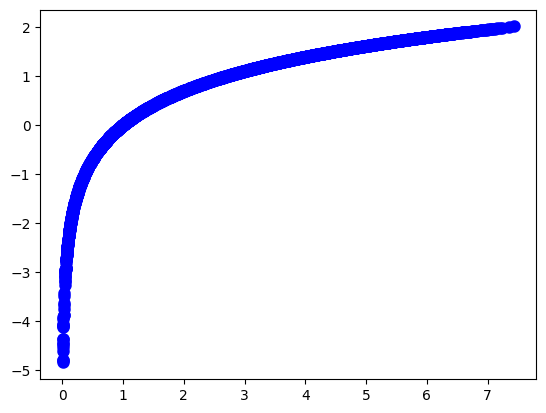

In [37]:
x=[]
i = 0
def f1(x):
  return np.log(x)

def generation_sa(count):
  xa=[]
  i = 0
  while i < count:
    rand=np.random.normal(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    xa.extend(rand)
    i = i + 1
  z1 = f1(xa)
  x1=np.reshape(xa,(len(xa),1))
  z1=np.reshape(z1,(len(z1),1))
  return x1, z1

qq, ee = generation_sa(5000)
X_train, X_test, y_train, y_test = train_test_split(qq, ee, test_size=0.4, random_state=123)
plt.scatter(qq, ee, marker = 'o', linewidths=3, c='BLUE')

In [38]:
dataset1 =np.concatenate((X_train,y_train),axis=1)
dataset1 = dataset1.tolist()
n_inputs = len(dataset1[0]) - 1
n_outputs = 1
alpha=0.25
l_rate=0.00001
n_epoch=30

network = initialize_network(n_inputs,30, n_outputs)
train_network(network, dataset1,l_rate, n_epoch, n_outputs)

> epoch=0, lrate=0.000, error=2674.500
> epoch=1, lrate=0.000, error=1341.967
> epoch=2, lrate=0.000, error=1339.642
> epoch=3, lrate=0.000, error=1337.719
> epoch=4, lrate=0.000, error=1336.131
> epoch=5, lrate=0.000, error=1334.835
> epoch=6, lrate=0.000, error=1333.798
> epoch=7, lrate=0.000, error=1332.988
> epoch=8, lrate=0.000, error=1332.376
> epoch=9, lrate=0.000, error=1331.939
> epoch=10, lrate=0.000, error=1331.655
> epoch=11, lrate=0.000, error=1331.505
> epoch=12, lrate=0.000, error=1331.472
> epoch=13, lrate=0.000, error=1331.541
> epoch=14, lrate=0.000, error=1331.699
> epoch=15, lrate=0.000, error=1331.933
> epoch=16, lrate=0.000, error=1332.234
> epoch=17, lrate=0.000, error=1332.592
> epoch=18, lrate=0.000, error=1332.998
> epoch=19, lrate=0.000, error=1333.445
> epoch=20, lrate=0.000, error=1333.926
> epoch=21, lrate=0.000, error=1334.435
> epoch=22, lrate=0.000, error=1334.967
> epoch=23, lrate=0.000, error=1335.517
> epoch=24, lrate=0.000, error=1336.081
> epoch=25

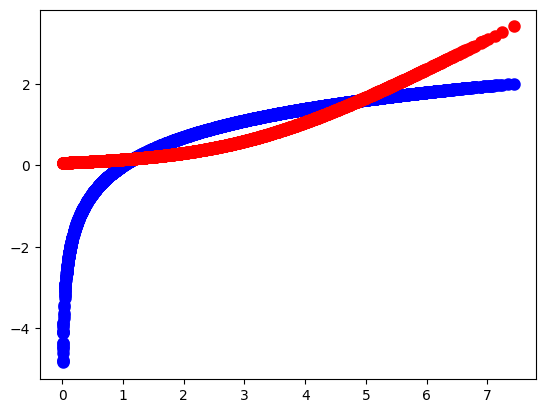

In [39]:
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs
i=-1
for row in X_train:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTrain = np.array(prediction)
    else:
      predictTrain =np.append(predictTrain,prediction,axis=0)

plt.scatter(qq, ee, marker = 'o', linewidths=3, c='BLUE')

plt.scatter(X_train, predictTrain, marker = 'o', linewidths=3,c='RED')

In [40]:
def approximation_quality(deviations, predictions, data):
    # Вычисление отношения верных предсказаний к общему числу точек
    correct_predictions = np.sum(np.abs(predictions - data) <= deviations)
    total_points = len(data)

    # Процент верно предсказанных точек
    accuracy_percentage = (correct_predictions / total_points) * 100

    return accuracy_percentage

deviations=np.std(X_train, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,predictTrain,X_train))



% верно полученных точек в тестовых данных
130845.73333333332


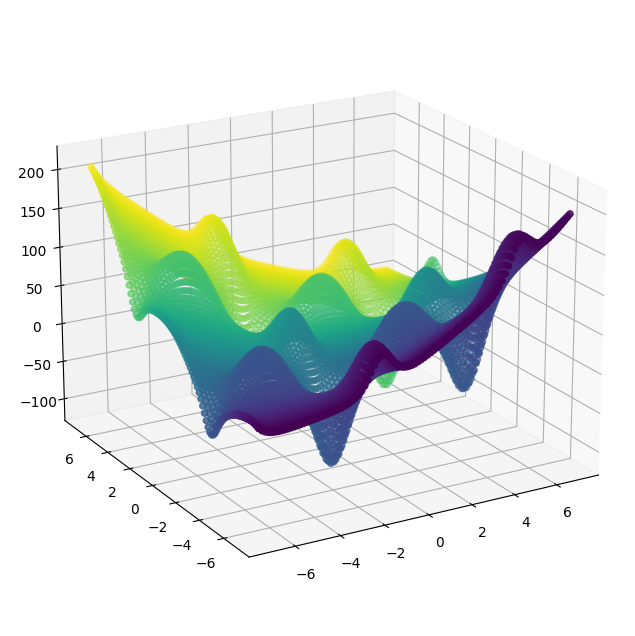

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

# Функция Бирда
def bird_function(x, y):
    return np.sin(x)*np.exp((1-np.cos(y))**2) + np.cos(y)*np.exp((1-np.sin(x))**2) + (x-y)**2

# Генерация данных и меш-грида для визуализации
x1val = np.linspace(-7, 7, 100)
x2val = np.linspace(-7, 7, 100)
x1, x2 = np.meshgrid(x1val, x2val)
z = bird_function(x1, x2)

# Визуализация функции Бирда
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(10000)
ax.scatter(x1, x2, z, marker='o', linewidths=1, c=col)

# Поворот графика против часовой стрелки
ax.view_init(elev=20, azim=-120)

# Подготовка данных для обучения и тестирования
x1 = x1.flatten()
x2 = x2.flatten()
z = z.flatten()

dataset = np.column_stack((x1, x2))
X_train, X_test, y_train, y_test = train_test_split(dataset, z, test_size=0.4, random_state=123)

plt.show()

In [57]:
dataset1 = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)

n_inputs = len(dataset1[0]) - 1
n_outputs = 1
alpha=0.2
l_rate=0.00001
n_epoch=100

network = initialize_network(n_inputs, 5 , n_outputs)
train_network(network, dataset1,l_rate, n_epoch, n_outputs)

> epoch=0, lrate=0.000, error=7032329.328
> epoch=1, lrate=0.000, error=4500718.222
> epoch=2, lrate=0.000, error=4185546.873
> epoch=3, lrate=0.000, error=4052389.959
> epoch=4, lrate=0.000, error=3977927.367
> epoch=5, lrate=0.000, error=3924362.236
> epoch=6, lrate=0.000, error=3875241.905
> epoch=7, lrate=0.000, error=3819234.915
> epoch=8, lrate=0.000, error=3762154.922
> epoch=9, lrate=0.000, error=3712058.495
> epoch=10, lrate=0.000, error=3666063.777
> epoch=11, lrate=0.000, error=3622307.602
> epoch=12, lrate=0.000, error=3581403.889
> epoch=13, lrate=0.000, error=3544766.562
> epoch=14, lrate=0.000, error=3513068.708
> epoch=15, lrate=0.000, error=3486156.370
> epoch=16, lrate=0.000, error=3463394.551
> epoch=17, lrate=0.000, error=3444023.475
> epoch=18, lrate=0.000, error=3427322.716
> epoch=19, lrate=0.000, error=3412694.113
> epoch=20, lrate=0.000, error=3399672.196
> epoch=21, lrate=0.000, error=3387883.657
> epoch=22, lrate=0.000, error=3377028.715
> epoch=23, lrate=0.0

In [50]:
# # Make a prediction with a network
def predict(network, row):
  outputs = forward_propagate(network, row)
  return outputs
i=-1
for row in dataset1:
    i=i+1
    prediction = predict(network, row)
    if (i==0):
      predictTrain = np.array(prediction)
    else:
      predictTrain =np.append(predictTrain,prediction,axis=0)

print(predictTrain)

[ 4.56468459  6.76065541 14.49852087 ... 30.29283425 29.41902444
 42.88314939]


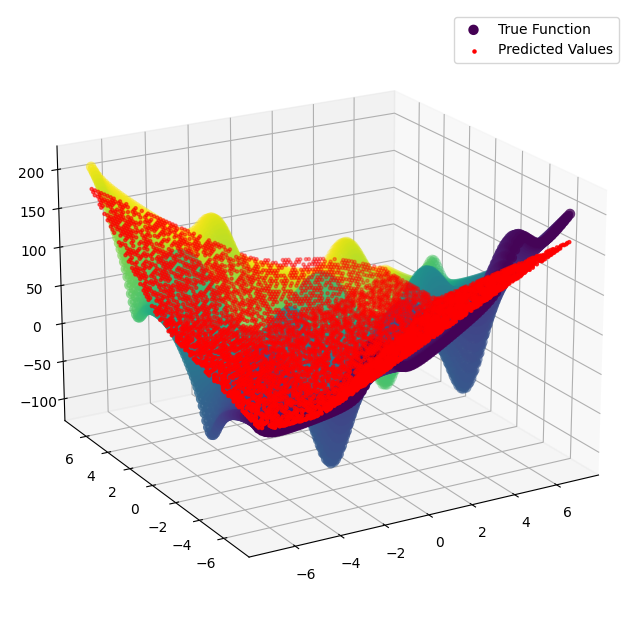

In [73]:
xx1val = np.linspace(-7, 7, 100)
xx2val = np.linspace(-7, 7, 100)
x1plt, x2plt = np.meshgrid(xx1val, xx2val)
y1plt = bird_function(x1plt, x2plt)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация функции Бирда
col = np.arange(10000)
ax.scatter(x1, x2, z, marker='o', linewidths=3, c=col, label='True Function')

# Поворот графика против часовой стрелки
ax.view_init(elev=20, azim=-120)

# Визуализация предсказанных значений на тренировочных данных
predictTrain = np.array([forward_propagate(network, row) for row in X_train])
predictTrain = np.reshape(predictTrain, (len(predictTrain), 1))

ax.scatter(X_train[:, 0], X_train[:, 1], predictTrain, marker='.', linewidths=1, c='RED', label='Predicted Values')

ax.legend()
plt.show()
# #-------------------------------------------------------------------------------3d график с вращением
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# # Создание данных для визуализации
# xx1val = np.linspace(-7, 7, 100)
# xx2val = np.linspace(-7, 7, 100)
# x1plt, x2plt = np.meshgrid(xx1val, xx2val)
# y1plt = bird_function(x1plt, x2plt)
# # Визуализация функции Бирда
# scatter_true = go.Scatter3d(x=x1plt.flatten(), y=x2plt.flatten(), z=y1plt.flatten(),
#                             mode='markers', marker=dict(size=3, color='blue'), name='True Function')
# # Визуализация предсказанных значений на тренировочных данных
# predictTrain = np.array([forward_propagate(network, row) for row in X_train])
# predictTrain = np.reshape(predictTrain, (len(predictTrain), 1))
# scatter_train = go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=predictTrain.flatten(),
#                              mode='markers', marker=dict(size=5, color='red'), name='Predicted Values')
# # Создание подграфика
# fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
# # Добавление визуализаций
# fig.add_trace(scatter_true)
# fig.add_trace(scatter_train)
# # Настройка макета
# fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
#                   margin=dict(l=0, r=0, b=0, t=0))
# # Отображение графика
# fig.show()

#ANFIS

In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/anfis-master/anfis/')
!pip install '/content/drive/MyDrive/Colab Notebooks/anfis-master/'
!pip install anfis
import anfis


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /content/drive/MyDrive/Colab Notebooks/anfis-master
  Preparing metadata (setup.py) ... done
  Created wheel for anfis: filename=anfis-0.3.1-py3-none-any.whl size=19201 sha256=58e6ff7c37e8c90ce7226632d52dd1070d4e902df7231da80fa9bb217e25aa60
  Stored in directory: /root/.cache/pip/wheels/2f/aa/12/6797e3645d914359272a7198248c7e31384dd1957612bbfc19
Successfully built anfis
  Attempting uninstall: anfis
    Found existing installation: anfis 0.3.1
    Uninstalling anfis-0.3.1:
      Successfully uninstalled anfis-0.3.1


In [2]:
def generation_f2(count,max_x,min_x,max_x2,min_x2):
  x2val=[]
  x1val=[]
  i = 0
  while i < count:
    rand=(np.random.normal(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(min_x) and rand<=(max_x) ):
      x1val.extend(rand)
      i = i + 1
  i = 0
  while i < count:
    rand=(np.random.normal(10, 1, 1)*np.random.uniform(0, 0.1, 1) ) + np.random.uniform(3.6, -5.6, 1)
    if (rand>=(min_x2) and rand<=(max_x2) ):
      x2val.extend(rand)
      i = i + 1
  return  x1val,x2val

def generation_f1(count):
  x1val=[]
  i = 0
  while i < count:
    rand=np.random.normal(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    x1val.extend(rand)
    i = i + 1
  return x1val

def approximation_quality(deviations,predictData,y_data):
  count=0
  for i in range(len(predictData)):
    if(predictData[i]>=(y_data[i]-deviations) and predictData[i]<=(y_data[i]+deviations)):
      count=count+1
  return percentage(count,len(predictData))

def f1(x):
  y=[]
  for i in range (0,(len(x))):
      y.append(np.log(x[i]))
  return y

def f2(x, y):
    return np.sin(x)*np.exp((1-np.cos(y))**2) + np.cos(y)*np.exp((1-np.sin(x))**2) + (x-y)**2

def percentage(part, whole):
  return 100 * float(part)/float(whole)

x1val = generation_f1(500)
#x1, x2 = np.meshgrid(x1val, x2val)
#f2z = f2(x1,x2)
z = f1(x1val)
x11=[]
x22=np.full(2500,0)
f2zz=[]
for l in x1val:
    x11.append(l)
for l in z:
    f2zz.append(l)

x11=np.reshape(x11,(len(x11),1))
x22=np.reshape(x22,(len(x22),1))
f2zz=np.reshape(f2zz,(len(f2zz),1))

if(os.path.exists('datasetMy.txt')):
    os.remove('datasetMy.txt')
file=open('datasetMy.txt','w')
for i in range(len(x11)):
  file.write('"'+str(i)+'" '+str(x11[i][0])+' '+str(x22[i][0])+' '+str(f2zz[i][0])+'\n')
file.close()

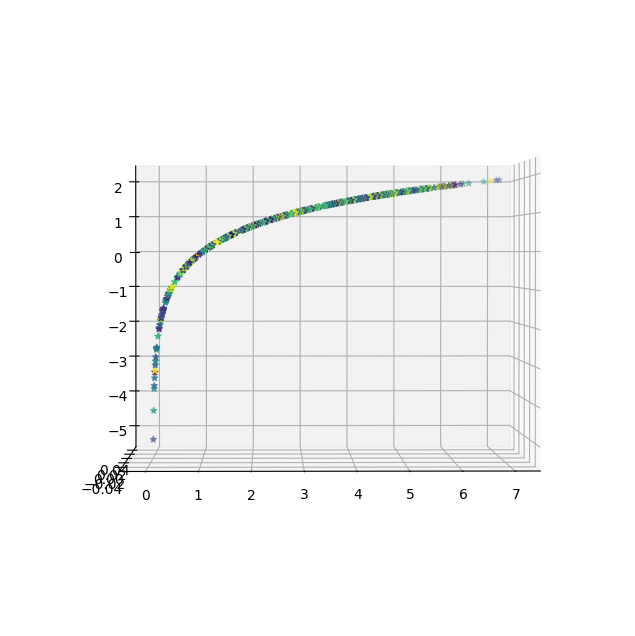

In [4]:
import matplotlib.pyplot as plt
ts = np.loadtxt("datasetMy.txt", usecols=[1,2,3])
X = ts[:,0:2]
Y = ts[:,2]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(Y))
ax.scatter(X[:, 0], X[:, 1], Y, marker = '*', linewidths=1, c=col)
ax.view_init(1, -91)

current error: 13.020560594518006
current error: 12.885783928268975
current error: 12.801459134509484
current error: 12.743696346667058
current error: 12.7009145275027
current error: 12.673378634186776
current error: 12.662466378003046
current error: 12.670363704549558
current error: 12.696583396325153
current error: 12.738715589709143
current error: 12.794443384184627
current error: 12.861188460492617
current error: 12.935853122091608
current error: 13.014656260088525
current error: 13.093109332497118
current error: 13.166185605023143
current error: 13.228680626627126
current error: 13.275658507264165
current error: 13.302811941665055
-1.105248
0.0
0.866194
Plotting errors


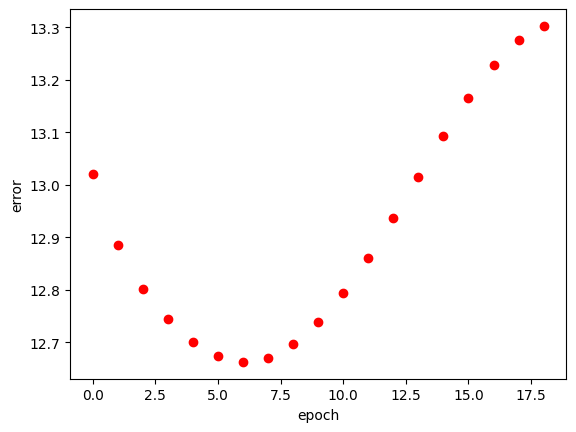

Plotting results


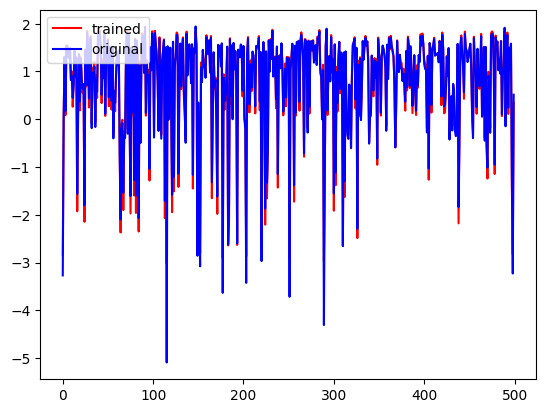

In [9]:
from anfis import membershipfunction

mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]

mfc = membershipfunction.MemFuncs(mf)
anf = anfis.anfis_model.ANFIS(X, Y, mfc)
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

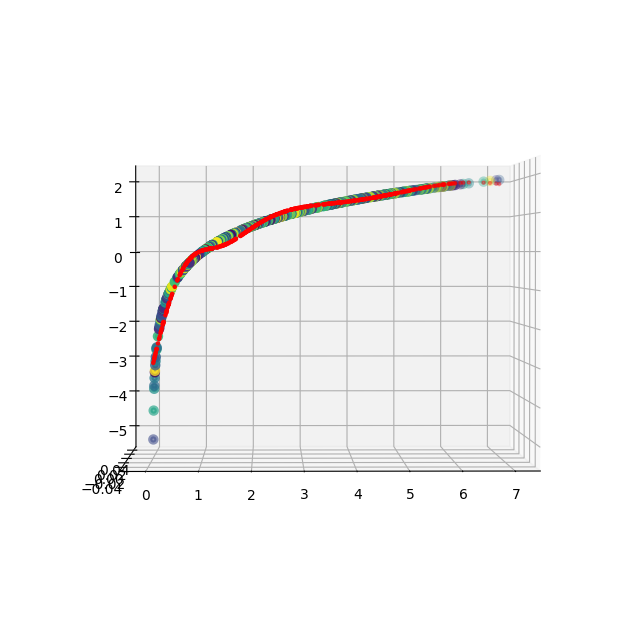

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
predictTrain=anfis.anfis_model.predict(anf,X)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

col = np.arange(len(Y))
ax.scatter(X[:, 0], X[:, 1], Y, marker = 'o', linewidths=3, c=col)
ax.scatter(X[:, 0], X[:, 1], predictTrain, marker = '.', linewidths=1,c='RED')
ax.view_init(1, -91)

In [15]:
deviations=np.std(Y, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,predictTrain,Y))

% верно полученных точек в тестовых данных
99.6


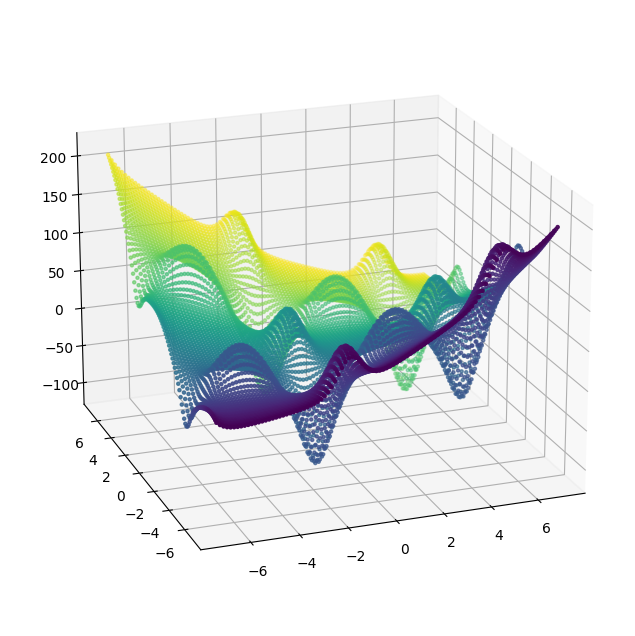

In [36]:
def bird_function(x, y):
    # Замените этот пример на вашу функцию Бирда
    return np.sin(x)*np.exp((1-np.cos(y))**2) + np.cos(y)*np.exp((1-np.sin(x))**2) + (x-y)**2

# Генерация данных для функции Бирда
x1val, x2val = np.linspace(-7, 7, 100), np.linspace(-7, 7, 100)
x1f2, x2f2 = np.meshgrid(x1val, x2val)
f2z = bird_function(x1f2, x2f2)

# Преобразование данных в нужный формат
x11f2, x22f2, f2zz = x1f2.flatten(), x2f2.flatten(), f2z.flatten()
x11f2, x22f2, f2zz = x11f2.reshape((len(x11f2), 1)), x22f2.reshape((len(x22f2), 1)), f2zz.reshape((len(f2zz), 1))

# Запись данных в файл
if os.path.exists('datasetMy.txt'):
    os.remove('datasetMy.txt')

file = open('datasetMy.txt', 'w')
for i in range(len(x11f2)):
    file.write(f'"{i}" {x11f2[i][0]} {x22f2[i][0]} {f2zz[i][0]}\n')
file.close()

# Загрузка данных из файла
ts = np.loadtxt("datasetMy.txt", usecols=[1, 2, 3])
XAF2 = ts[:, 0:2]
YAF2 = ts[:, 2]

# Визуализация функции Бирда
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(YAF2))
ax.scatter(XAF2[:, 0], XAF2[:, 1], YAF2, marker='.', linewidths=1, c=col)
ax.view_init(20,-110)
plt.show()



current error: 3702443.91087089
current error: 3711707.855388311
current error: 3720407.1135047297
current error: 3728653.2676399616
-179.188484
-126.959822
3.695991
Plotting errors


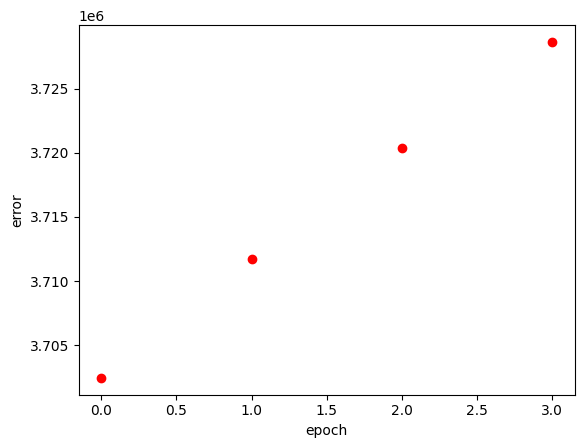

Plotting results


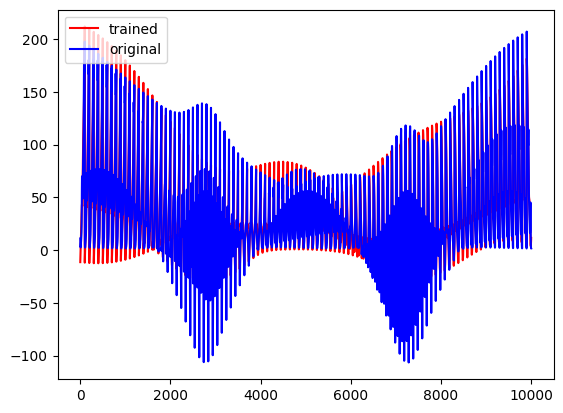

In [38]:
mf = [[['gaussmf',{'mean':0.,'sigma':1.}],['gaussmf',{'mean':-1.,'sigma':2.}],['gaussmf',{'mean':-4.,'sigma':10.}],['gaussmf',{'mean':-7.,'sigma':7.}]],
            [['gaussmf',{'mean':1.,'sigma':2.}],['gaussmf',{'mean':2.,'sigma':3.}],['gaussmf',{'mean':-2.,'sigma':10.}],['gaussmf',{'mean':-10.5,'sigma':5.}]]]

mfc = membershipfunction.MemFuncs(mf)
anf = anfis.anfis_model.ANFIS(XAF2, YAF2, mfc)
anf.trainHybridJangOffLine(epochs=20)
print(round(anf.consequents[-1][0],6))
print(round(anf.consequents[-2][0],6))
print(round(anf.fittedValues[9][0],6))
if round(anf.consequents[-1][0],6) == -5.275538 and round(anf.consequents[-2][0],6) == -1.990703 and round(anf.fittedValues[9][0],6) == 0.002249:
	print('test is good')

print("Plotting errors")
anf.plotErrors()
print("Plotting results")
anf.plotResults()

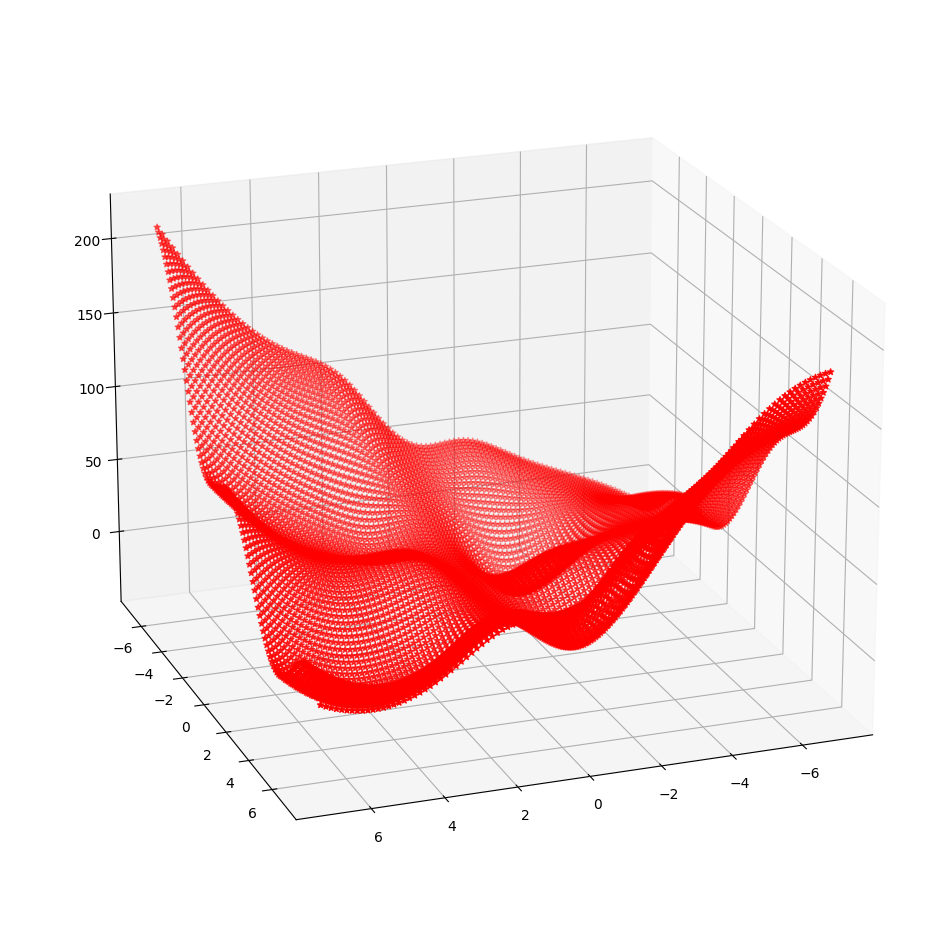

In [39]:
predictTrain=anfis.anfis_model.predict(anf,XAF2)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')

col = np.arange(len(YAF2))
ax.scatter(XAF2[:, 0], XAF2[:, 1], predictTrain, marker = '*', linewidths=1,c='RED')
ax.view_init(20,70)

In [41]:
deviations=np.std(YAF2, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,predictTrain,YAF2))

% верно полученных точек в тестовых данных
96.75


#RBF

In [62]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import geometric
import pickle
from sklearn.model_selection import train_test_split

In [64]:
import numpy as np
import pickle
import random  # Добавим импорт модуля random

class RBF:
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        # Здесь мы инициализируем центры, соответствующие скрытым нейронам RBF
        self.centers = np.random.uniform(-1, 1, (numCenters, indim))
        # Здесь два важных параметра, определяющих сеть RBF.
        # Первый параметр представляет собой β, второй - вес соединения
        self.betas = np.ones(numCenters) / 10
        self.W = np.random.random((self.numCenters, self.outdim))

    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return np.log(1 + np.linalg.norm(d - self.centers[c]) ** 2)

    # def _basisfunc(self, c, d):
    #     assert len(d) == self.indim
    #     return np.exp(-self.betas[c] * np.linalg.norm(d - self.centers[c]) ** 2)

    def _calcAct(self, X):
        # рассчитываем активации RBF
        G = np.zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi, ci] = self._basisfunc(ci, x)
        return G

    def train(self, X, Y):
        """
        X: матрица размерности n x indim
        y: столбцовый вектор размерности n x 1
        """
        # используем k-средние для вычисления центров
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=self.numCenters)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        # рассчитываем активации RBF
        G = self._calcAct(X)

        # рассчитываем веса выхода (псевдообратная матрица)
        self.W = np.dot(np.linalg.pinv(G), Y)

    def test(self, X):
        """
        X: матрица размерности n x indim
        """
        G = self._calcAct(X)
        Y = np.dot(G, self.W)
        return Y


In [65]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

def predict(loaded_model, row):
  outputs = forward_propagate(loaded_model, row)
  return outputs

def approximation_quality(deviations,predictData,y_data):
  count=0
  for i in range(len(predictData)):
    if(predictData[i]>=(y_data[i]-deviations) and predictData[i]<=(y_data[i]+deviations)):
      count=count+1
  return percentage(count,len(predictData))

def f2(x, y):
    return np.sin(x)*np.exp((1-np.cos(y))**2) + np.cos(y)*np.exp((1-np.sin(x))**2) + (x-y)**2


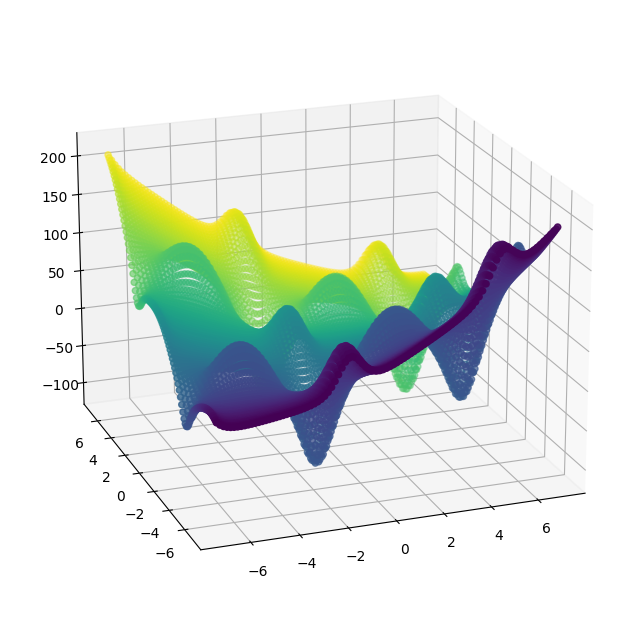

In [74]:
filename_model = 'modelBird.sav'

# Генерация данных для функции Бирда
x1val, x2val = np.linspace(-7, 7, 100), np.linspace(-7, 7, 100)
x1, x2 = np.meshgrid(x1val, x2val)
z = bird_function(x1, x2)

# Преобразование данных в нужный формат
x11, x22, zz = x1.flatten(), x2.flatten(), z.flatten()
x11, x22, zz = x11.reshape((len(x11), 1)), x22.reshape((len(x22), 1)), zz.reshape((len(zz), 1))

# Создание датасета
dataset = np.concatenate((x11, x22), axis=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dataset, zz, test_size=0.4, random_state=123)

# Сохранение данных для последующего использования в обучении модели
np.savetxt('datasetBird.txt', np.concatenate((X_train, y_train), axis=1))

# Визуализация функции Бирда
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(zz))
ax.scatter(x1.flatten(), x2.flatten(), zz.flatten(), marker='o', linewidths=1, c=col)
ax.view_init(20, -110)
plt.show()


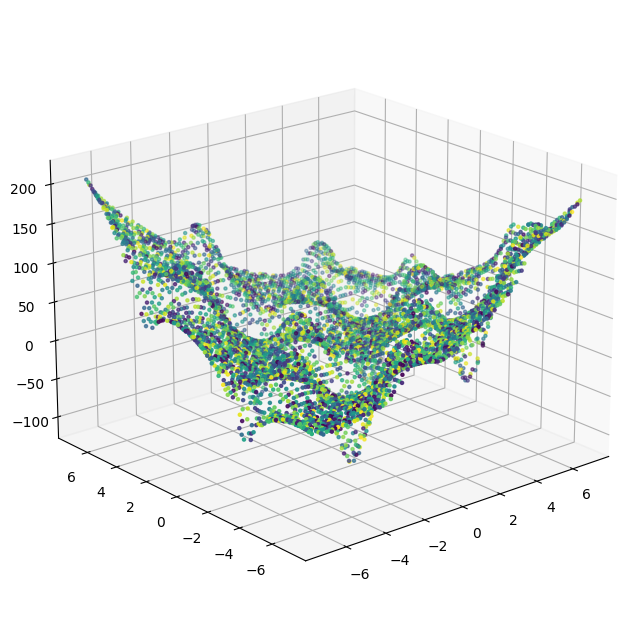

In [75]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(y_train))
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker = '.', linewidths=1, c=col)
ax.view_init(20, -130)

In [76]:
rbf = RBF(2, 150, 1)  # Уменьшим количество кластеров
rbf.train(X_train, y_train)
rez_train = rbf.test(X_train)
rez_test = rbf.test(X_test)
pickle.dump(rbf, open(filename_model, 'wb'))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


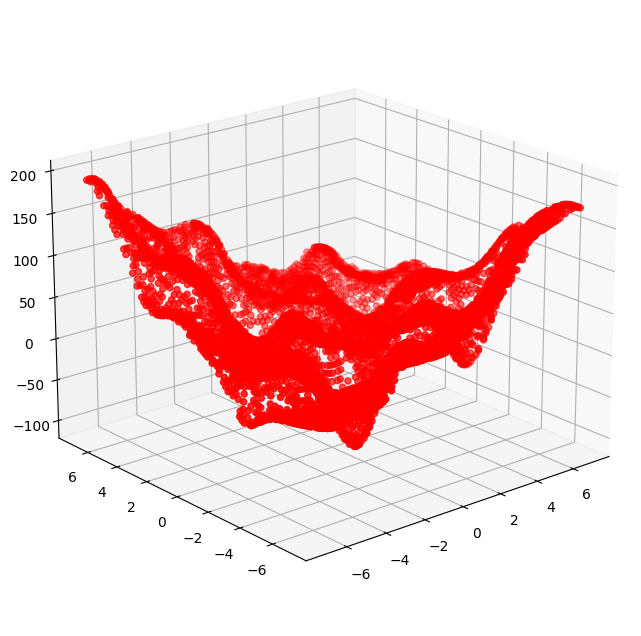

In [78]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')
col = np.arange(len(y_train))
#ax.scatter(X_train[:, 0], X_train[:, 1], y_train, marker = 'o', linewidths=1, c=col)
ax.scatter(X_train[:, 0], X_train[:, 1], rez_train, marker = 'o', linewidths=1, c='red')
ax.view_init(20, -130)

In [79]:
loaded_model = pickle.load(open(filename_model, 'rb'))
deviations=np.std(y_test, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,rez_test,y_test))

% верно полученных точек в тестовых данных
100.0


In [80]:
def generation_sa(count):
  xa=[]
  i = 0
  while i < count:
    rand=np.random.normal(10, 1, 1)*np.random.uniform(0, 0.6, 1)
    xa.extend(rand)
    i = i + 1
  z1 = f1(xa)
  x1=np.reshape(xa,(len(xa),1))
  z1=np.reshape(z1,(len(z1),1))
  return x1, z1

In [81]:
filename_model = 'modelF1-СетьRBF-line.sav'

X, Y = generation_sa(500)

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=123)

In [82]:
rbf = RBF(1, 300, 1)
rbf.train(X_train, y_train)
rez_train = rbf.test(X_train)
rez_test = rbf.test(X_test)
pickle.dump(rbf, open(filename_model, 'wb'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


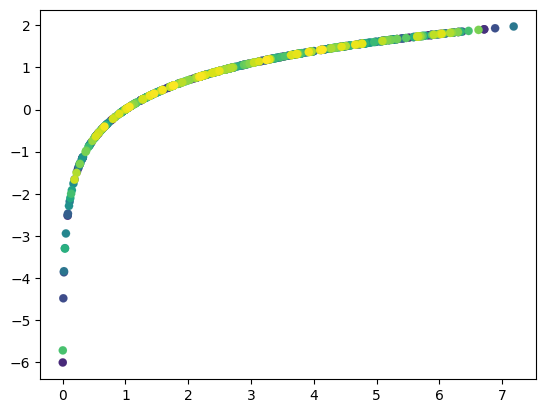

In [83]:
plt.scatter(X, Y , marker = 'o', linewidths=0.1, c=np.arange(len(Y)))

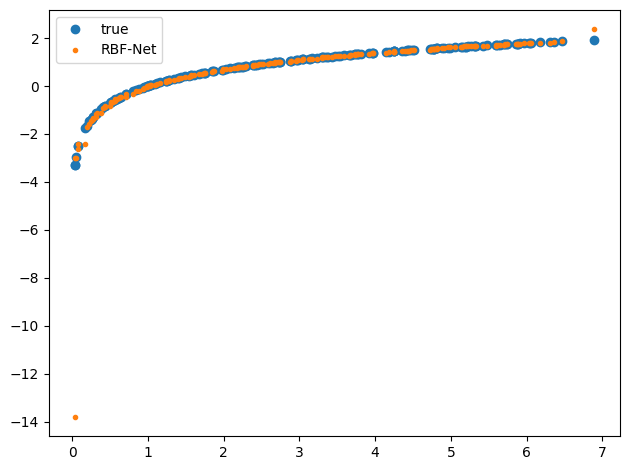

In [85]:
rez_test = rbf.test(X_test)
plt.plot(np.sort(X_test, axis=0), np.sort(y_test, axis=0), 'o', label='true')
plt.plot(np.sort(X_test, axis=0) , np.sort(rez_test , axis=0), '.', label='RBF-Net')
plt.legend()
plt.tight_layout()
plt.show()

In [86]:
loaded_model = pickle.load(open(filename_model, 'rb'))
deviations=np.std(y_test, ddof=1)
print('% верно полученных точек в тестовых данных')
print(approximation_quality(deviations,rez_test,y_test))

% верно полученных точек в тестовых данных
99.5
